Tarea 3 - pregunta 2

¿En qué medida el acceso a computador e internet en el hogar explica las diferencias en el puntaje global de las pruebas Saber 11, una vez considerado el estrato socioeconómico, en Cundinamarca? 

In [1]:
#librerias necesarias para exploración y limpieza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#subir archivo con los datos
df_limpio = pd.read_csv("df_limpio.csv")
df_limpio.head()

FileNotFoundError: [Errno 2] No such file or directory: 'df_limpio.csv'

In [2]:
print(df_limpio[["PUNT_GLOBAL", "FAMI_TIENECOMPUTADOR", 
                 "FAMI_ESTRATOVIVIENDA", "COLE_MCPIO_UBICACION", 
                 "FAMI_TIENEINTERNET"]])

        PUNT_GLOBAL  FAMI_TIENECOMPUTADOR  FAMI_ESTRATOVIVIENDA  \
0             196.0                     0                     1   
1             258.0                     1                     1   
2             302.0                     1                     2   
3             241.0                     0                     2   
4             200.0                     1                     2   
...             ...                   ...                   ...   
285572        218.0                     1                     1   
285573        325.0                     0                     1   
285574        191.0                     1                     2   
285575        220.0                     1                     2   
285576        220.0                     1                     2   

       COLE_MCPIO_UBICACION  FAMI_TIENEINTERNET  
0                   GRANADA                   0  
1                   CHOACHI                   1  
2                    SOACHA                  

### Analisis de datos

Aqui debo trabajar el con "df_limpio" general 

Análisis general del Puntaje Global 

In [3]:
#estadisticas descriptivas
df_limpio["PUNT_GLOBAL"].describe()

count    285577.000000
mean        261.803121
std          46.713931
min          17.000000
25%         228.000000
50%         260.000000
75%         293.000000
max         483.000000
Name: PUNT_GLOBAL, dtype: float64

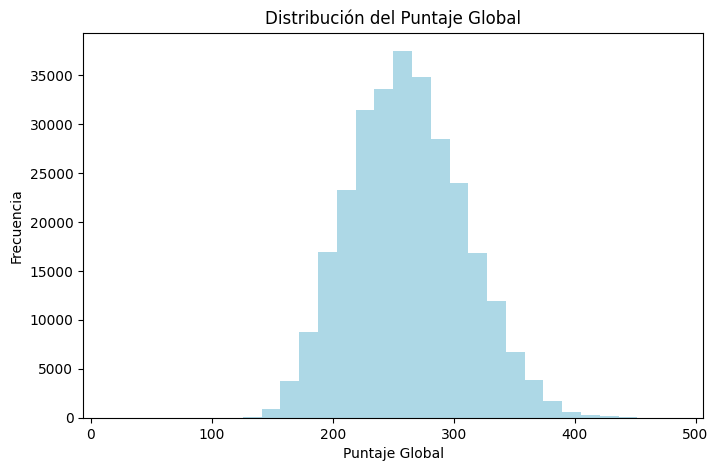

In [4]:
#histograma de la distribución del puntaje global 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio["PUNT_GLOBAL"], bins=30, color="lightblue")
plt.title("Distribución del Puntaje Global")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

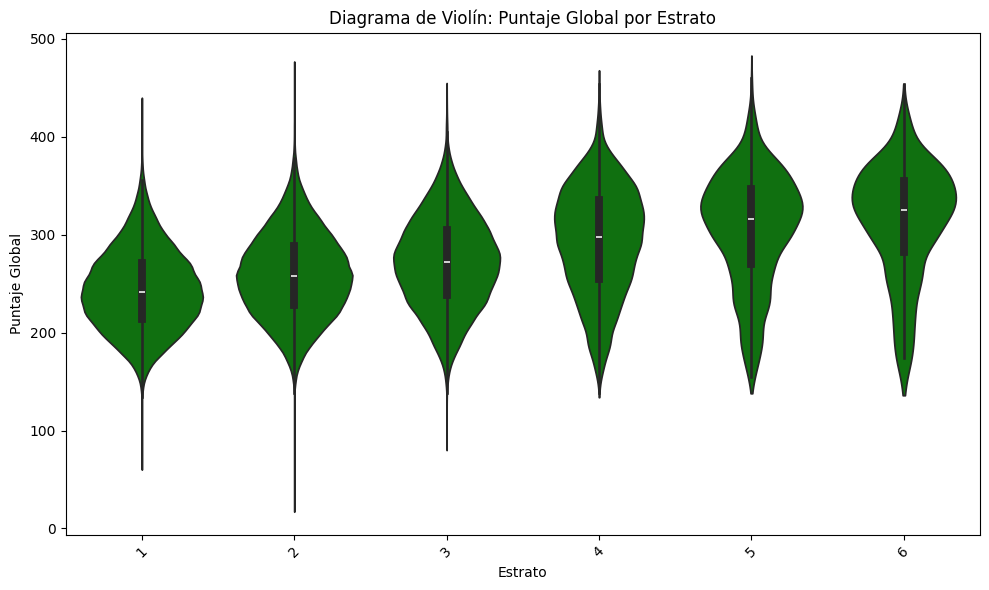

In [5]:

plt.figure(figsize=(10,6))

sns.violinplot(
    x='FAMI_ESTRATOVIVIENDA',
    y='PUNT_GLOBAL',
    data=df_limpio,
    inner='box',
    color= "green",        
    cut=0               
)

plt.title('Diagrama de Violín: Puntaje Global por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Puntaje Global')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Revisando los municipios y el puntaje global

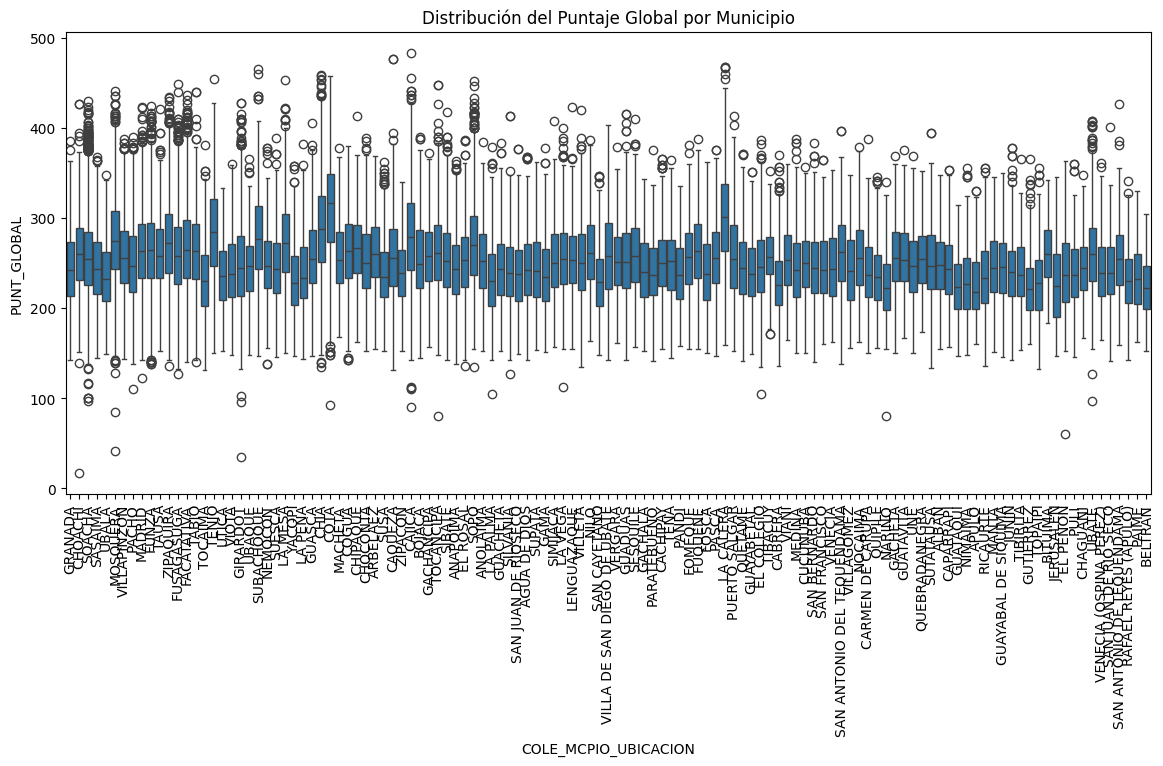

In [6]:
#puntaje global promedio por municipio en cundinamarca
df_limpio.groupby('COLE_MCPIO_UBICACION')['PUNT_GLOBAL'].mean().sort_values(ascending=False)

#box plot de los datos del puntaje global por municipio
plt.figure(figsize=(14,6))
sns.boxplot(x='COLE_MCPIO_UBICACION',
            y='PUNT_GLOBAL',
            data=df_limpio)

plt.xticks(rotation=90)
plt.title("Distribución del Puntaje Global por Municipio")
plt.show()

In [7]:
#en cada municipio
#cuánto cambia el puntaje promedio entre tener y no tener internet

brecha_municipio = df_limpio.groupby(
    ['COLE_MCPIO_UBICACION','FAMI_TIENEINTERNET']
)['PUNT_GLOBAL'].mean().unstack()

brecha_municipio['Brecha'] = brecha_municipio[1] - brecha_municipio[0]

brecha_municipio.sort_values('Brecha', ascending=False).head(10)

FAMI_TIENEINTERNET,0,1,Brecha
COLE_MCPIO_UBICACION,,,
COTA,254.288612,314.519426,60.230815
LA CALERA,261.535959,306.432620,44.896661
CHIA,250.913268,291.568785,40.655517
CAJICA,247.942118,287.285897,39.343779
TENJO,253.796569,292.314862,38.518294
SUBACHOQUE,261.267470,292.934629,31.667159
VENECIA,236.253968,266.400000,30.146032
NARIÑO,215.709220,245.796610,30.087390
MOSQUERA,252.393265,279.883441,27.490176


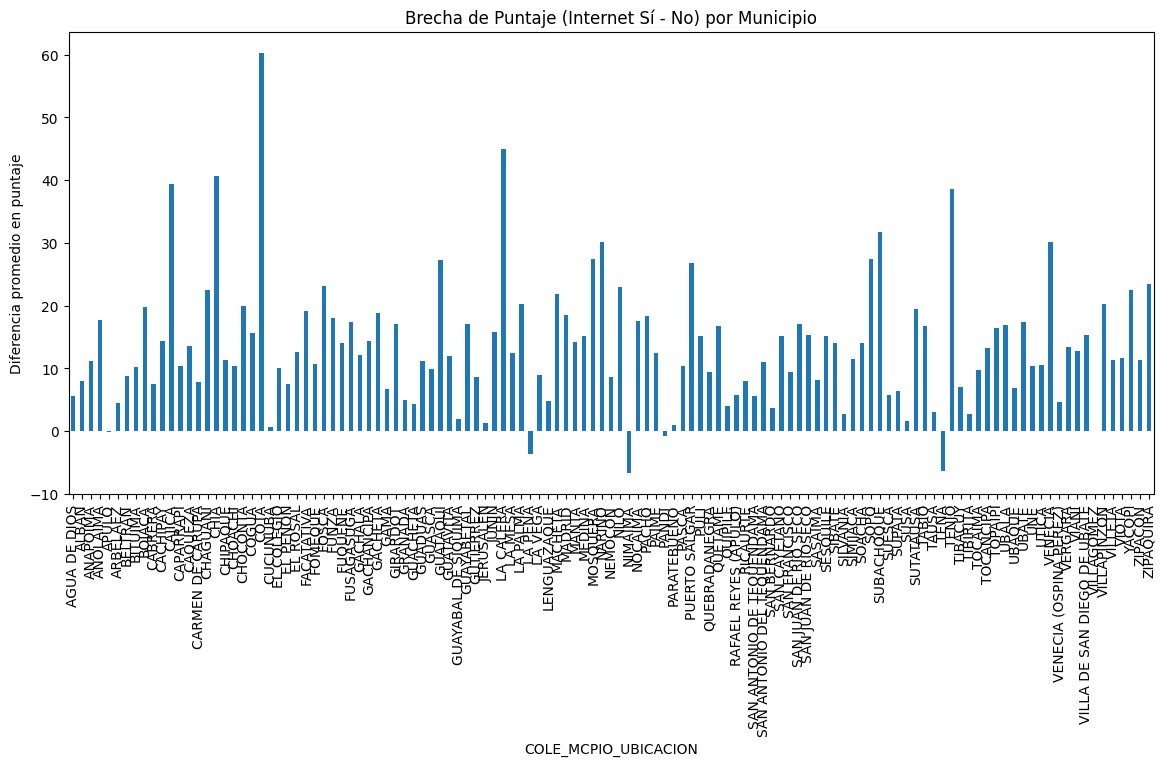

In [8]:
#graficando la brecha 

brecha_municipio['Brecha'].plot(kind='bar', figsize=(14,6))
plt.title("Brecha de Puntaje (Internet Sí - No) por Municipio")
plt.ylabel("Diferencia promedio en puntaje")
plt.xticks(rotation=90)
plt.show()

In [9]:
#agrupar para ver la media del puntaje global de cuando tiene computador 
df_limpio.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()


FAMI_TIENECOMPUTADOR
0    244.295599
1    269.800602
Name: PUNT_GLOBAL, dtype: float64

In [10]:

#agrupar para ver la media del puntaje global de cuando tiene internet 
df_limpio.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()

FAMI_TIENEINTERNET
0    246.187744
1    269.836594
Name: PUNT_GLOBAL, dtype: float64

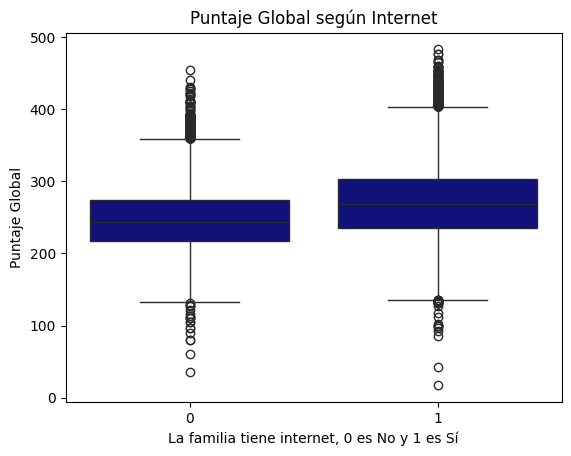

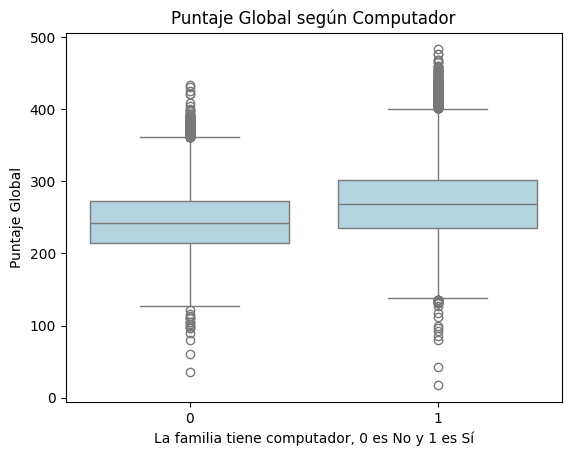

In [11]:
#box plot por internet 
plt.figure()
sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=df_limpio, color= "darkblue")
plt.title("Puntaje Global según Internet")
plt.xlabel("La familia tiene internet, 0 es No y 1 es Sí")
plt.ylabel("Puntaje Global")
plt.show()


#box plot por computador
plt.figure()
sns.boxplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", data=df_limpio, color= "lightblue")
plt.title("Puntaje Global según Computador")
plt.xlabel("La familia tiene computador, 0 es No y 1 es Sí")
plt.ylabel("Puntaje Global")
plt.show()

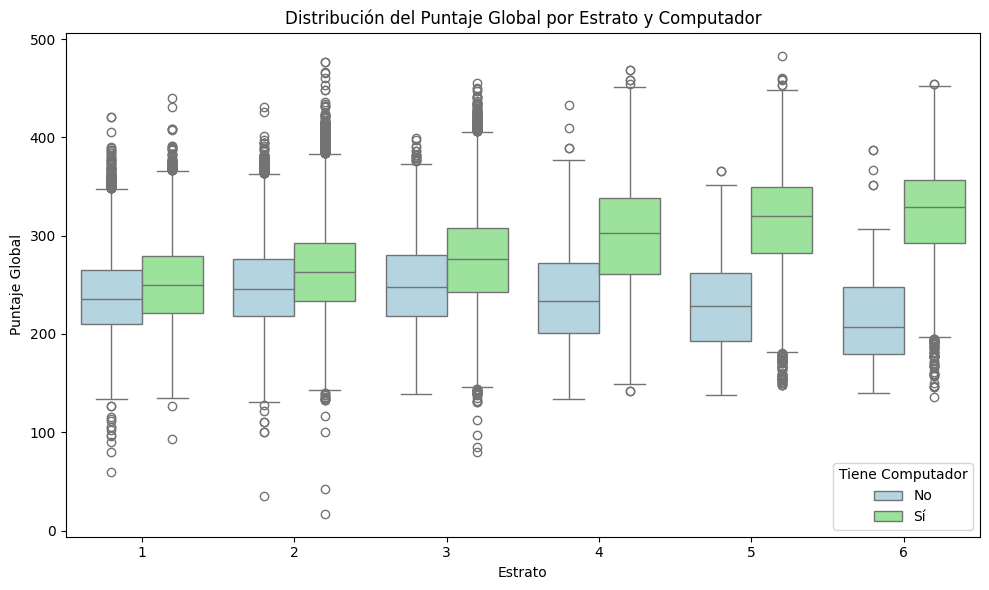

In [12]:
#box plot
plt.figure(figsize=(10,6))

ax = sns.boxplot(
    data=df_limpio,
    x="FAMI_ESTRATOVIVIENDA",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENECOMPUTADOR",
    palette={0: "lightblue", 1: "lightgreen"}
)

plt.title("Distribución del Puntaje Global por Estrato y Computador")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

# Corregir leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Sí"], title="Tiene Computador")

plt.tight_layout()
plt.show()

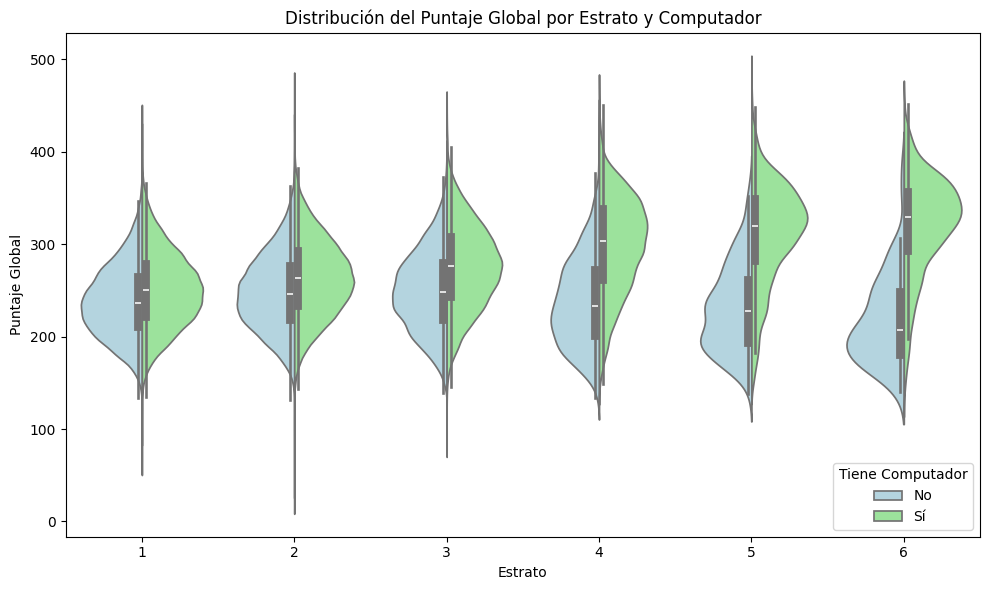

In [13]:
#violin por estrato y si tiene pc e internet
plt.figure(figsize=(10,6))

ax = sns.violinplot(
    data=df_limpio,
    x="FAMI_ESTRATOVIVIENDA",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENECOMPUTADOR",
    split=True,
    palette={0: "lightblue", 1: "lightgreen"}
)

plt.title("Distribución del Puntaje Global por Estrato y Computador")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

#leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Sí"], title="Tiene Computador")

plt.tight_layout()
plt.show()

<Axes: xlabel='PUNT_GLOBAL', ylabel='Density'>

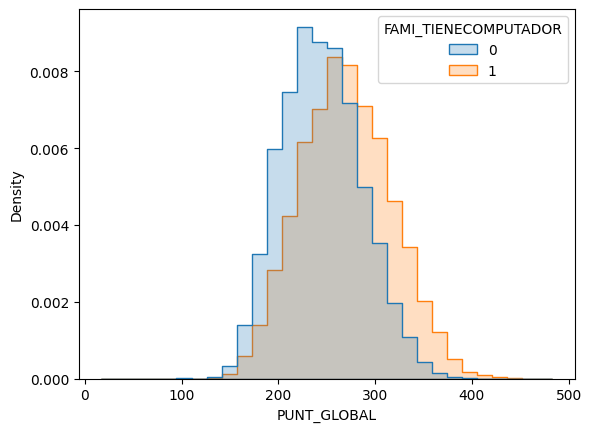

In [14]:
sns.histplot(
    data=df_limpio,
    x="PUNT_GLOBAL",
    hue="FAMI_TIENECOMPUTADOR",
    bins=30,
    element="step",
    stat="density",
    common_norm=False
)

In [15]:
#combinación de la brecha tecnologica

df_limpio.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()
df_limpio.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()
df_limpio.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()

df_limpio.groupby(
    ["FAMI_ESTRATOVIVIENDA",
     "FAMI_TIENECOMPUTADOR",
     "FAMI_TIENEINTERNET"]
)["PUNT_GLOBAL"].mean()

FAMI_ESTRATOVIVIENDA  FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET
1                     0                     0                     237.485341
                                            1                     243.873791
                      1                     0                     247.208611
                                            1                     253.405827
2                     0                     0                     246.044057
                                            1                     252.150913
                      1                     0                     256.788235
                                            1                     265.683440
3                     0                     0                     243.939752
                                            1                     253.960211
                      1                     0                     259.852983
                                            1                     276.982754
4            

Modelo de regresión


In [16]:
#modelo de regresión para ver que tan significativo es tener 
#computador e internet en el puntaje global con una variable de control de estrato
import statsmodels.formula.api as smf

modelo = smf.ols(
    'PUNT_GLOBAL ~ FAMI_TIENECOMPUTADOR + FAMI_TIENEINTERNET + C(FAMI_ESTRATOVIVIENDA) ',
    data=df_limpio
).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5852.
Date:                Fri, 27 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:22:53   Log-Likelihood:            -1.4838e+06
No. Observations:              285577   AIC:                         2.968e+06
Df Residuals:                  285569   BIC:                         2.968e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Mapa de calor de las correlaciones

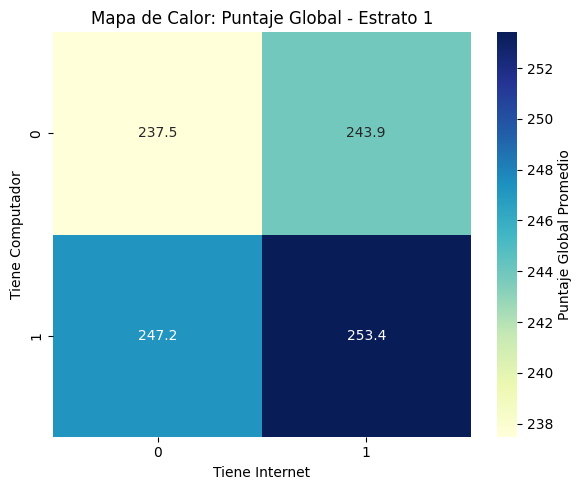

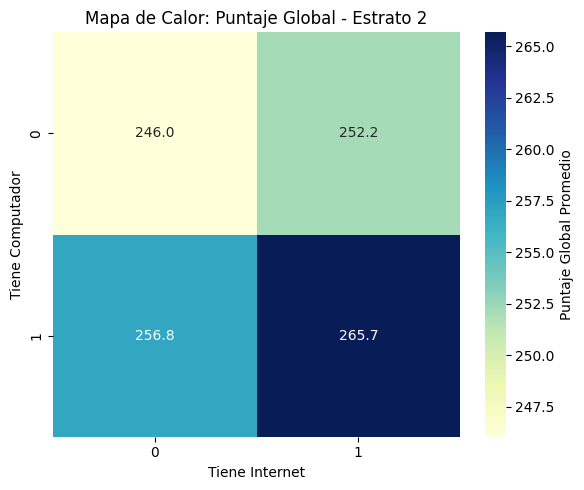

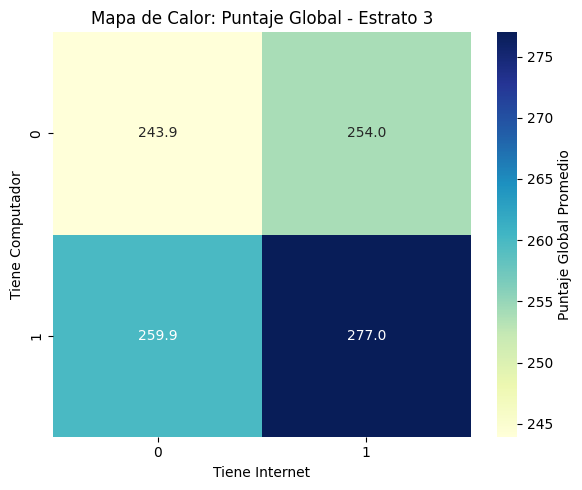

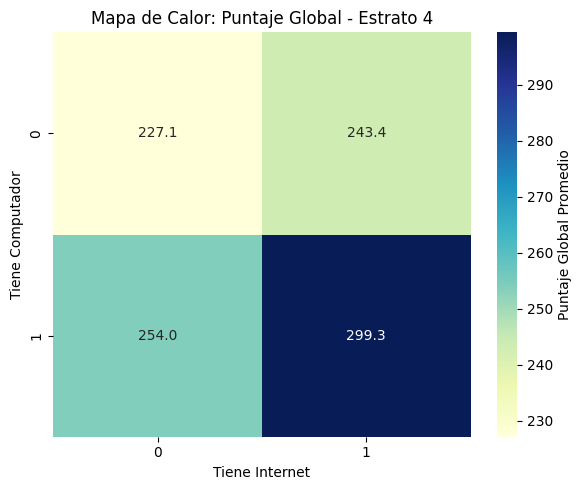

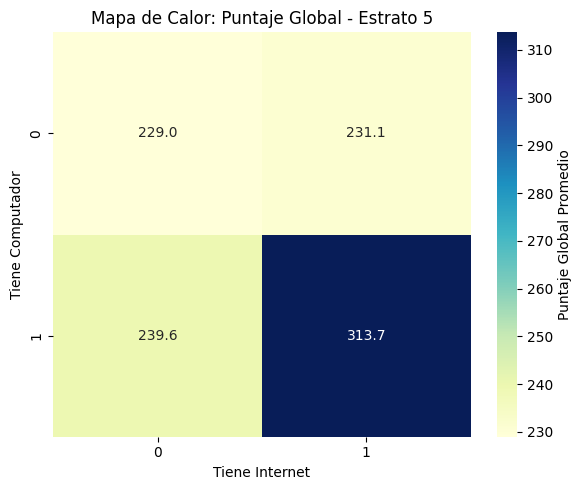

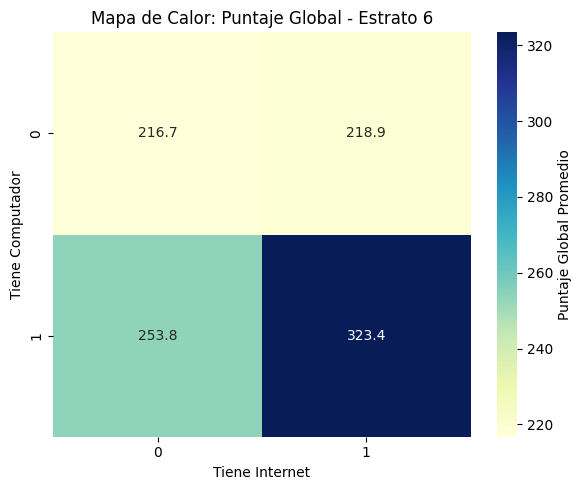

In [17]:
estratos = sorted(df_limpio["FAMI_ESTRATOVIVIENDA"].dropna().unique())

for e in estratos:
    
    df_e = df_limpio[df_limpio["FAMI_ESTRATOVIVIENDA"] == e]
    
    tabla_heatmap = df_e.groupby(
        ['FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET']
    )['PUNT_GLOBAL'].mean().unstack()
    
    
    plt.figure(figsize=(6,5))
    
    sns.heatmap(
        tabla_heatmap,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Puntaje Global Promedio'}
    )
    
    plt.title(f"Mapa de Calor: Puntaje Global - Estrato {e}")
    plt.xlabel("Tiene Internet")
    plt.ylabel("Tiene Computador")
    
    plt.tight_layout()
    plt.show()

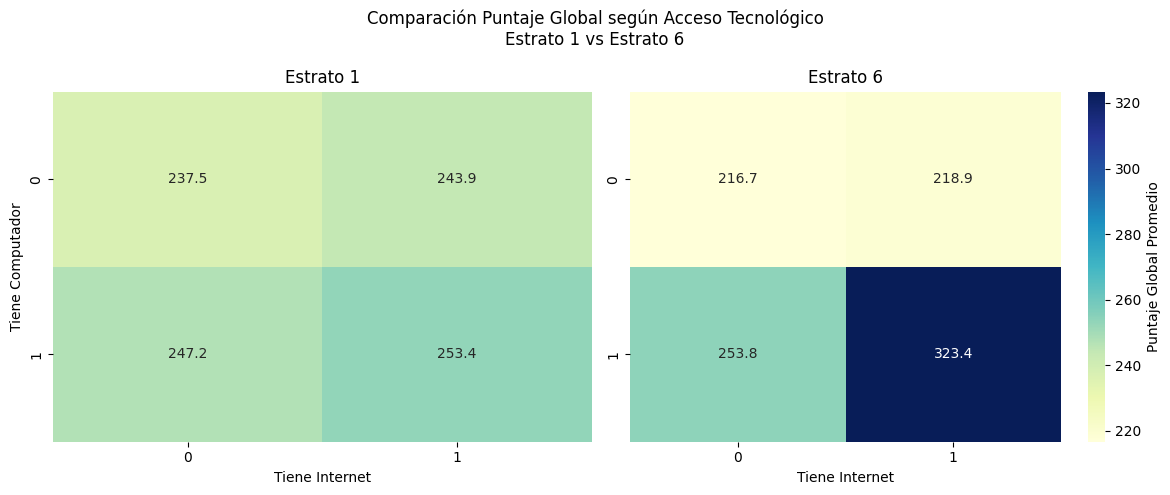

In [18]:
#mapa de calor estrato 1 vs estrato 6 
df_e1 = df_limpio[df_limpio["FAMI_ESTRATOVIVIENDA"] == 1]
df_e6 = df_limpio[df_limpio["FAMI_ESTRATOVIVIENDA"] == 6]

#tablas
tabla_e1 = df_e1.groupby(
    ['FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET']
)['PUNT_GLOBAL'].mean().unstack()

tabla_e6 = df_e6.groupby(
    ['FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET']
)['PUNT_GLOBAL'].mean().unstack()

#misma escala de colores para comparación real
# Obtener todos los valores de ambas tablas
valores = list(tabla_e1.values.flatten()) + list(tabla_e6.values.flatten())

vmin = min(valores)
vmax = max(valores)

#crear figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(
    tabla_e1,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    vmin=vmin,
    vmax=vmax,
    ax=axes[0],
    cbar=False
)

axes[0].set_title("Estrato 1")
axes[0].set_xlabel("Tiene Internet")
axes[0].set_ylabel("Tiene Computador")

sns.heatmap(
    tabla_e6,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    vmin=vmin,
    vmax=vmax,
    ax=axes[1],
    cbar_kws={'label': 'Puntaje Global Promedio'}
)

axes[1].set_title("Estrato 6")
axes[1].set_xlabel("Tiene Internet")
axes[1].set_ylabel("")

plt.suptitle("Comparación Puntaje Global según Acceso Tecnológico\nEstrato 1 vs Estrato 6")

plt.tight_layout()
plt.show()